# Computational Exercise 1: A Vary Great, Very Harmonic, Wavefunction
We will apply the Variational Method to the Harmonic Oscillator.  In particular, we will optimize
the trial wavefunction given by 
\begin{equation}
\Phi(x) = {\rm exp}\left( -\alpha x^2 \right),
\end{equation}
where $\alpha$ is an adjustable parameter that will be variationally optimized.  In particular, the goal
will be to minimize the energy functional given by
\begin{equation}
E[\Phi(x)] = \frac{\int_0^{\infty} \Phi^* (x) \: \hat{H} \: \Phi(x) dx }{\int_0^{\infty} \Phi^* (x) \: \Phi(x) dx }
\end{equation}
by modulating the trial wavefunction through the adjustable parameter $\alpha$.

The Hamiltonian operator for Harmonic Oscillator is given by 
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2} k \: x^2.
\end{equation}
We will use a system of natural units where $\hbar = 1$, the mass of the particle $m = 1$, and the force constant of
the potential $k = 1$.

### Questions
1. What is the optimal value of $E[\Phi(x)]$ in natural units?  How does this value compare to the true ground state energy of the Harmonic Oscillator?
2. What is the optimal value of $\alpha$ in natural units?  How does $\Phi(x)$ with this value of $\alpha$ compare to the true ground state wavefunction?
3. What is the kinetic energy expectation value of the optimized trial wavefunction in natural units?
4. What is the potential energy expectation value of the optimized trial wavefunction in natural units?

### (Hopefully) Helpful Hints
You can represent your trial wavefunction numerically on the computer by creating an array of x-values, evaluating
the formula for your trial wavefunction at each of those x-values, and then storing each of those function values in another array.  The following lines of code will do this using $numpy$ arrays and the $numpy.exp$ function. 


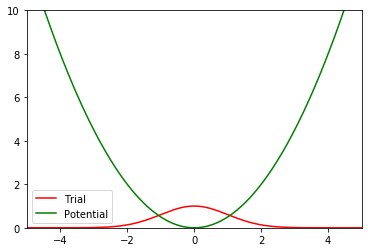

In [85]:
import numpy as np
from matplotlib import pyplot as plt
### create an array of 1000 x-values between x=-20 and x=20 atomic units
x_array = np.linspace(-20,20,1000)
### pick a trial value of alpha... might as well be 1 atomic unit!
alpha = 1/2
### evaluate your trial wavefunction at each of the x-values stored in the array called 'x_array'
Phi = np.exp(-alpha * x_array**2)
Vx=1/2.*x_array**2

plt.plot(x_array, Phi, 'red', label ='Trial')
plt.plot(x_array, Vx, 'green', label='Potential')
plt.xlim(-5,5)
plt.ylim(0,10)
plt.legend()
plt.show()

To evaluate the kinetic energy of a trial wavefunction, we will need to take the second derivative of the trial wavefunction.
One way to take derivatives on a computer is to use the method of finite differences.  In particular, the forward finite difference
approximation to the first derivative of your trial wavefunction $\Phi(x)$ at the point $x_0$ can be written symbolically as
\begin{equation}
\frac{d \Phi(x_0)}{dx} = \frac{\Phi(x_0 + dx) - \Phi(x_0)}{dx}
\end{equation}
where in our code, $dx$ will be determined by the range of x-values and the number of x-values used in defining
$x_{array}$.

Create a function called $dfdx$ that takes an array of x-values and an array of function values evaluated at each x-value and
returns the first derivative of the function values with respect to x.  Then, show that calling this function in sequence can be used to compute the second derivative of an array of function values.  

A skeleton of the function looks like this:

In [86]:
def dfdx(fx, x):
    ### loop through values of fx and x and use forward finite-differences 
    ### to compute the d/dx of fx at each point and store in an array called 'fxp'
    ### make sure to poperly handle
    ### the last point where f(x_0 + dx) is not stored
  
    fxp = np.zeros_like(fx)

    for i in range(0,len(x)-1):
    
        rise= fx[i+1]-fx[i]
        run= x[i+1]-x[i]
        slope = rise/run
        fxp[i] = slope
        
        
    #first_rise=fx[1]-fx[0]
    #first_run=x[1]-x[0]
    #first_slope=first_rise/first_run
    #this is for only one slope
    
    ### create a numpy array called fxp that has the same length
    ### and data type as the array of function values you are differentiating
   
    
    
    ### once you have computed all fxp values, return the array!
    return fxp

def TPhi(fx,x):
    # This take the first derivative of fx and stores it as fxp
    fxp= dfdx(fx,x)
    # this takes the first derivative of fxp and stores it as fxpp
    fxpp=dfdx(fxp,x)
    # now return second derivative of fx multiplies by -1/2
    return -1/2*fxpp

def VPhi(fx,x):
    return 1/2*x**2*fx

def HPhi(fx,x):
    return TPhi(fx,x) + VPhi(fx,x)
### Function will take our trial wavefunction and our grid of 
### x values and return the energy expectation value
### using rectangular rule for the integrals!
def E_of_Phi(fx,x):
    ###get my dx value!
    dx= x[1]-x[0]
    ### get my numerator function!
    hp = HPhi(fx,x)
    phi_star = np.conj(fx)
    num_func = phi_star*hp
    ### get my denominator function 
    den_func = phi_star*fx
    
    ### define numerator sum variable
    num_sum= 0.
    ### define denominator sum variable 
    den_sum= 0.
    ### perform the loop to comupte the rectangle-rule approzimation to th integrals!
    for i in range(1,len(x)):
        ### add the area of the numerator rectangle to num_sum 
        num_sum = num_sum + num_func[i] * dx
        ### add the area of the denominator rectangle to den_sum 
        den_sum = den_sum + den_func[i] * dx
    
    return num_sum/den_sum

In [87]:
E_Trial = E_of_Phi(Phi,x_array)
print(E_Trial)

0.4996495063588535


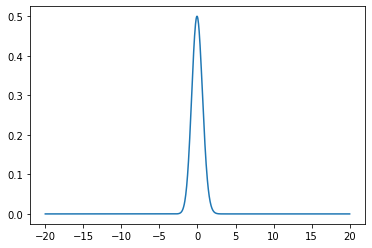

In [88]:
hp= HPhi(Phi,x_array)
plt.plot(x_array,np.conj(Phi)*hp)
plt.show()

And the calling sequence for $dfdx$ to compute the second derivative of a trial wavefunction we defined previously will look like this:

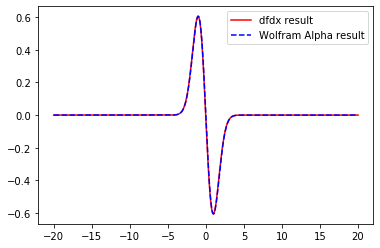

In [89]:
### Call dfdx on Phi to get the first derivative of Phi
Phi_p = dfdx(Phi, x_array)

Phi_wa= -2*alpha*x_array*Phi

plt.plot(x_array, Phi_p, 'red', label='dfdx result')
plt.plot(x_array, Phi_wa, 'b--', label= "Wolfram Alpha result")
plt.legend()
plt.show()

### Call dfdx on Phi_p to get the second derivative of Phi
Phi_pp = dfdx(Phi_p, x_array)

In [ ]:
1.) The optimal wavefunction 𝐸[Φ(𝑥)] is greater than the true ground state energy of the Harmonic Oscillator which 1/2. 
2.) When trying to figure out what aplha is, I just plugged in numbers that would get my trial wave funcation lower or close to
the energy grown state and I have chosen 1/2 for alpha. 

In [94]:
## questions 3 and 4 answers:

def T_of_Phi(fx,x):
    dx= x[1]-x[0]
    hp = TPhi(fx,x)
    phi_star = np.conj(fx)
    num_func = phi_star*hp
    den_func = phi_star*fx
    
    ### define numerator sum variable
    num_sum= 0.
    ### define denominator sum variable 
    den_sum= 0.
    ### perform the loop to comupte the rectangle-rule approzimation to th integrals!
    for i in range(1,len(x)):
        ### add the area of the numerator rectangle to num_sum 
        num_sum = num_sum + num_func[i] * dx
        ### add the area of the denominator rectangle to den_sum 
        den_sum = den_sum + den_func[i] * dx
        
    return num_sum/den_sum
    
def V_of_Phi(fx,x):
    
    dx= x[1]-x[0]
    hp = VPhi(fx,x)
    phi_star = np.conj(fx)
    num_func = phi_star*hp
    den_func = phi_star*fx
    
    ### define numerator sum variable
    num_sum= 0.
    ### define denominator sum variable 
    den_sum= 0.
    ### perform the loop to comupte the rectangle-rule approzimation to th integrals!
    for i in range(1,len(x)):
        ### add the area of the numerator rectangle to num_sum 
        num_sum = num_sum + num_func[i] * dx
        ### add the area of the denominator rectangle to den_sum 
        den_sum = den_sum + den_func[i] * dx
        
    return num_sum/den_sum




In [95]:
T_Trial = T_of_Phi(Phi, x_array)
print(T_Trial)

V_Trial=  V_of_Phi(Phi, x_array)
print(V_Trial)

0.24964950635885358
0.25
